**Задание**

Провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;

каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;

по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [141]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10,20
#импортируем данные о вулканах
data = pd.read_csv('database.csv')
data.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


**1. Построим столбчатую диаграмму распределения количества извержений по странам мира.**

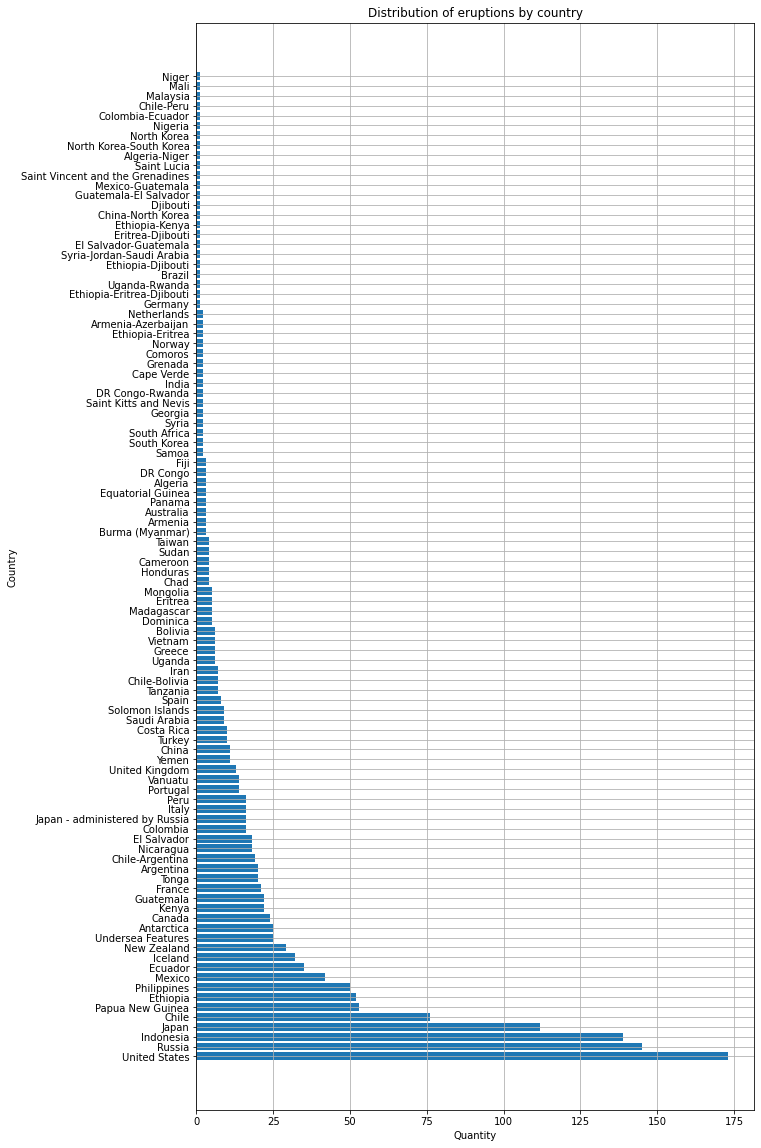

In [63]:
#Определим, сколько извержений было в каждой стране
data.sort_values(['Country'],axis=0,ascending=True, inplace=True)
data_barh=data.groupby('Country').count()[['Number']]
data_barh['Country']=data['Country'].unique()
data_barh.sort_values('Number', ascending=False,inplace=True)
plt.barh(data_barh['Country'],data_barh['Number'])
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Distribution of eruptions by country')
plt.grid()

**Вывод:** Итак, по диаграмме видно, что наибольшее количество вулканов наблюдалось в Соединенных Штатах.

**2. Построим круговую диаграмму по 10 годам с наибольшим количеством извержений вулканов.**

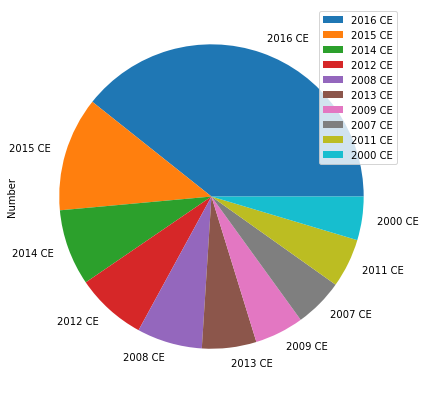

In [120]:
# Агрегируем количество извержений по годам
data_dynamics=data.loc[data['Last Known Eruption']!='Unknown',['Last Known Eruption','Number']]
data_dynamics = data_dynamics.groupby(['Last Known Eruption']).count()
data_dynamics.sort_values('Number', ascending=False,inplace=True)
rcParams['figure.figsize'] = 7,7
data_dynamics.head(10).plot(kind='pie', y='Number')

**Вывод:** Итак, по диаграмме видно, что наибольшее количество извержений наблюдалось в 2016 г. н.э.

**3. Посмотрим на распределение высот вулканов над уровнем моря.**

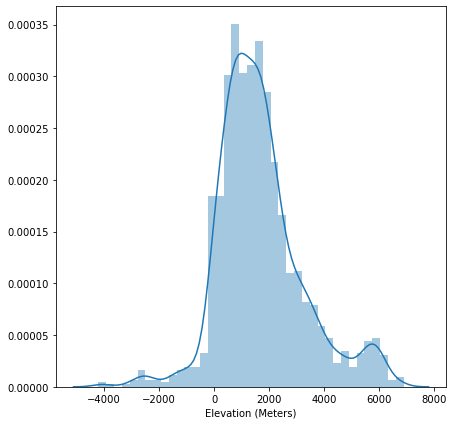

In [119]:
import seaborn as sns
rcParams['figure.figsize'] = 7,7
sns.distplot(data['Elevation (Meters)'])



**Вывод:** Итак, по распределению видно, что чаще всего встречаются вулканы средней высоты.

**4. Cтилизуем таблицу распределения вулканов по регионам.**

In [139]:
data1=data.groupby(['Region']).count()[['Number']]
data1.sort_values('Number', ascending=False,inplace=True)
data1.style.bar()

,Number
Region,
South America,197
Indonesia,142
"Japan, Taiwan, Marianas",141
Kamchatka and Mainland Asia,132
Africa and Red Sea,131
México and Central America,120
Alaska,88
Melanesia and Australia,80
Canada and Western USA,71


**Вывод:** Итак, по таблице видно, что наибольшее количество вулканов - в Южной Америке.